In [1]:
%pip install numpy matplotlib warnings

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [1]:
import numpy as np
import functions as fc # imports functions file  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def return_ring_coord(inner_radius=2, outer_radius=5):
    # Generate a regular grid of points
    x = np.linspace(-outer_radius, outer_radius, 20)
    y = np.linspace(-outer_radius, outer_radius, 20)
    x, y = np.meshgrid(x, y)

    xc = np.linspace(-outer_radius, outer_radius, 100)
    yc = np.linspace(-outer_radius, outer_radius, 100)
    xc, yc = np.meshgrid(xc, yc)

    # Filter out the points outside the circle
    outer_mask = x**2 + y**2 <= outer_radius**2
    inner_mask = x**2 + y**2 <= inner_radius**2
    outer_mask_c = xc**2 + yc**2 <= outer_radius**2
    inner_mask_c = xc**2 + yc**2 <= inner_radius**2

    ring = outer_mask & ~inner_mask
    ring_c = outer_mask_c & ~inner_mask_c

    x_in_circle = np.ma.array(x, mask = ~ring)
    y_in_circle = np.ma.array(y, mask = ~ring)
    x_in_circle_c = np.ma.array(xc, mask = ~ring_c)
    y_in_circle_c = np.ma.array(yc, mask = ~ring_c)

    return x_in_circle, y_in_circle, x_in_circle_c, y_in_circle_c

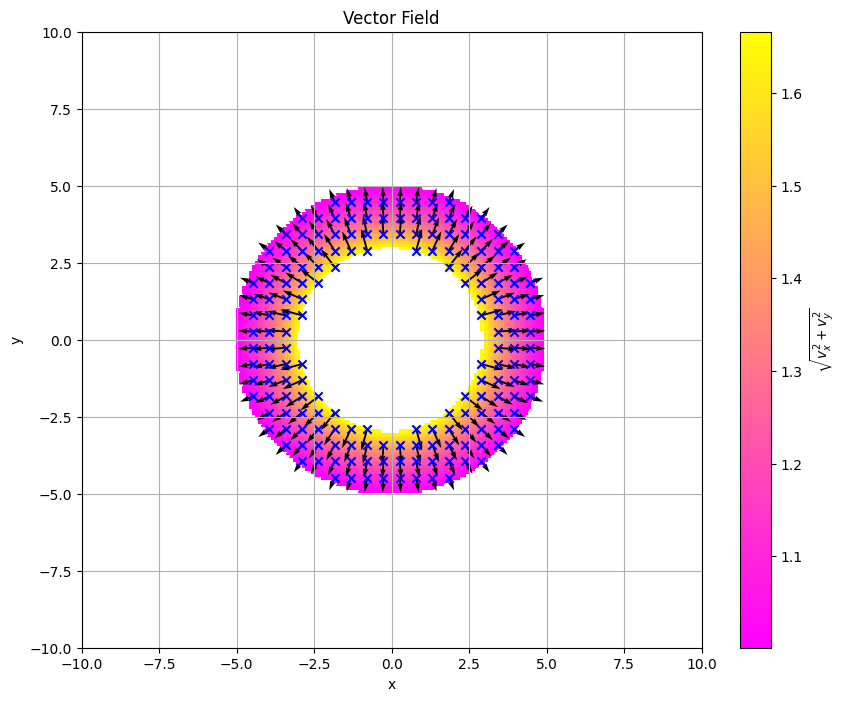

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

# first region
x, y, xc, yc = return_ring_coord(0,3)

u = 0
v = 0

uc = 0*xc
vc = 0*yc
zc = np.sqrt((np.square(uc) + np.square(vc)))
# fc.plot_vector_field(u,v,zc=zc, x=x,y=y,xc=xc,yc=yc,figure=[fig,ax],cbar=False)

# second region 
x, y, xc, yc = return_ring_coord(3,5)

constant = 5
u = constant*x/(np.sqrt(x**2 + y**2)**2)
v = constant*y/(np.sqrt(x**2 + y**2)**2)

uc = constant*xc/(np.sqrt(xc**2 + yc**2)**2)
vc = constant*yc/(np.sqrt(xc**2 + yc**2)**2)
zc = np.sqrt((np.square(uc) + np.square(vc)))
fc.plot_vector_field(u,v,zc=zc, x=x,y=y,xc=xc,yc=yc,figure=[fig,ax],cbar=True)

# third region 
x, y, xc, yc = return_ring_coord(5,15)

constant = 5
u = 0
v = 0 

uc = 0*xc
vc = 0*yc
zc = np.sqrt((np.square(uc) + np.square(vc)))
# fc.plot_vector_field(u,v,zc=zc, x=x,y=y,xc=xc,yc=yc,figure=[fig,ax],cbar=False)

plt.show()

## Dipole images
<img src="images/VFPt_dipoles_electric.png" width=700>